# Dark Frame Histogram

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from tifffile import imwrite
import os
import cv2
import matplotlib.colors as mcolors

# import sys
# sys.path.append('../../tauSWIRcamera')  # Add the path to the directory containing file_to_import.py
# from tauSWIRcamera import tauSWIRcamera

plt.rcParams["font.family"] = "Times New Roman"

In [2]:
print(os.getcwd())

/Users/BrunoMattos/Documents/UNIVERSITY/RESEARCH/FINIS/CAMERAS/finis-camera/calibration/dark_frame


In [10]:

# Dark frame parameters
cameraFolder = "CAM1"
gain = "medium"
t_ms = 10
fpaTemp = 20
N = 25
hist_color = {"low": "green", "medium": "blue", "high": "red" }

# Load dark frame mean and std
df_mean = cv2.imread(f'{cameraFolder}/dark_frame_{gain}_{fpaTemp}C_{cameraFolder}_expTime_{t_ms}.0ms.tif',cv2.IMREAD_ANYDEPTH)
df_std = cv2.imread(f'{cameraFolder}/dark_frame_std_{gain}_{fpaTemp}C_{cameraFolder}_expTime_{t_ms}.0ms.tif',cv2.IMREAD_ANYDEPTH)


## Dark Frame Histogram

Pixel coordinates and values outside the clip range:
(381, 5) - Mean value: 1772.88 +/- 125.37697396252632
(322, 41) - Mean value: 1620.32 +/- 107.2800894854213
(148, 84) - Mean value: 71.68 +/- 114.94371492169546
(536, 155) - Mean value: 389.6 +/- 68.08112807526032
(463, 406) - Mean value: 287.8 +/- 79.94097822768997
(617, 432) - Mean value: 61.44 +/- 109.3332813008006
(241, 437) - Mean value: 40.96 +/- 93.85115023269559


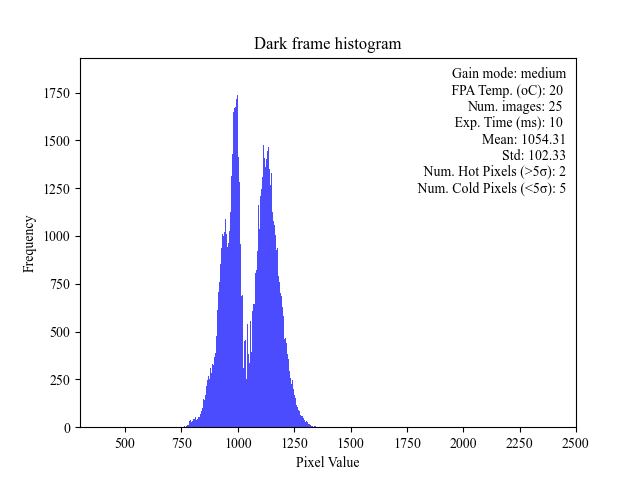

In [11]:
%matplotlib widget
img = df_mean
# Calculate mean and standard deviation
mean_value = np.mean(img)
std_value = np.std(img)

# Clip the histogram around mean ± 5 * standard deviation
clip_range = (mean_value - 5 * std_value, mean_value + 5 * std_value)

# Histogram xaxis range
hist_range = [300, 2500]

# Find pixel coordinates outside the clip range
pixel_coords = np.where((img < clip_range[0]) | (img > clip_range[1]))

# Print the coordinates and corresponding pixel values outside the clip range
print("Pixel coordinates and values outside the clip range:")
for y, x in zip(pixel_coords[0], pixel_coords[1]):
    pixel_value = img[y, x]
    pixel_value_std = df_std[y,x]
    print(f"({x}, {y}) - Mean value: {pixel_value} +/- {pixel_value_std}")

# Find pixel coordinates outside the clip range
pixel_coords = np.where((img < clip_range[0]) | (img > clip_range[1]))

# Count the number of pixels outside the clipped range
num_hot_pixels = np.sum((img > clip_range[1]))
num_cold_pixels = np.sum((img < clip_range[0]))
pixels_outside_range = np.sum((img < clip_range[0]) | (img > clip_range[1]))

with open(f"{cameraFolder}/dark_frame_statistics_{gain}_{fpaTemp}C_{cameraFolder}_expTime_{t_ms}ms", 'w') as f:
    # Append some information to the file
    f.write(f'Number of pixels outside +/- 5sigma range: {pixels_outside_range}\n')
    f.write(f'Num hot pixels (>5sigma): {num_hot_pixels}\n')
    f.write(f'Num cold pixels (<5sigma): {num_cold_pixels}\n\n')
    f.write(f'num, Pixel_x, Pixel_y, Pixel_Mean, Pixel_Std\n')
    n=1
    for y, x in zip(pixel_coords[0], pixel_coords[1]):
        pixel_value = img[y, x]
        pixel_value_std = df_std[y,x]
        f.write(f'{n}, {x}, {y}, {pixel_value}, {pixel_value_std}\n')
        n=n+1

## Histogram
plt.figure()
# Create the histogram
hist, bins, _ = plt.hist(img.flatten(), bins=1000, range=clip_range, density=False, color=hist_color[gain], alpha=0.7)
plt.xlim(hist_range)  # Adjust the limits as needed

# Display the mean and standard deviation
plt.text(0.98, 0.80, f'Gain mode: {gain}\n FPA Temp. (oC): {fpaTemp} \nNum. images: {N} \n Exp. Time (ms): {t_ms} \nMean: {mean_value:.2f}\nStd: {std_value:.2f}\n Num. Hot Pixels (>5σ): {num_hot_pixels}\n Num. Cold Pixels (<5σ): {num_cold_pixels}', horizontalalignment='right', verticalalignment='center', transform=plt.gca().transAxes, fontsize=10)

# Set the title and labels
plt.title(f'Dark frame histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Save the plot as a PDF file
plt.savefig(f'{cameraFolder}/dark_frame_histogram_{gain}_{fpaTemp}C_{cameraFolder}_expTime_{t_ms}ms.pdf', format='pdf')

# Display the histogram
plt.show()

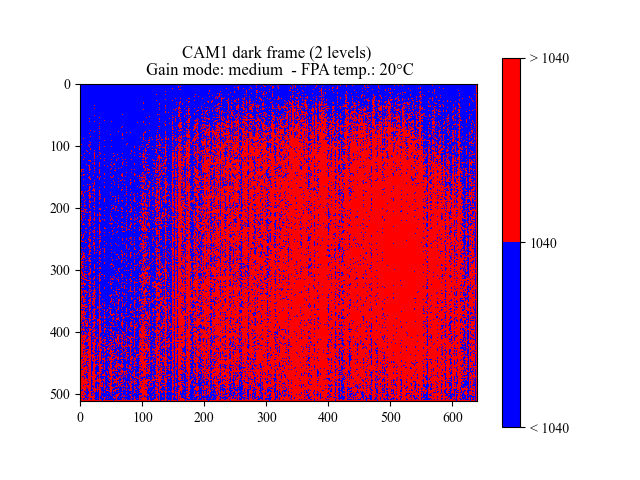

In [12]:
image_data = df_mean
# Threshold
threshold = 1040

n_intervals = 5

# Create a custom colormap
colors = ['blue', 'red']  # Colors: below and above the threshold
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors, N=2)
bounds = [image_data.min(), threshold, image_data.max()]
# bounds = [750, 1050, 1400]
# bounds = np.linspace(image_data.min(), image_data.max(), n_intervals)
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Plot the image
fig, ax = plt.subplots()
cax = ax.imshow(image_data, cmap=cmap, norm=norm)

# Create a colorbar
cbar = fig.colorbar(cax, ticks=[image_data.min(), threshold, image_data.max()])
# cbar = fig.colorbar(cax, ticks=bounds)
cbar.ax.set_yticklabels([f'< {threshold}', f'{threshold}', f'> {threshold}'])

plt.title(f'{cameraFolder} dark frame (2 levels) \n Gain mode: {gain}  - FPA temp.: {fpaTemp}°C')



# Save the plot as a PDF file
plt.savefig(f'{cameraFolder}/dark_frame_image_2levels_{gain}_{fpaTemp}C_{cameraFolder}_expTime_{t_ms}ms.pdf', format='pdf')

plt.show()


In [13]:
print()